In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
EXPERIMENT_DIR = '/home/ubuntu/experiments/dwm-test'
EXTRACTED_FEATURES_DIR = "{}/extracted-features".format(EXPERIMENT_DIR)
EXTRACTED_FEATURES_DB_NAME = "{}/extracted-features.sqlite".format(EXTRACTED_FEATURES_DIR)


In [3]:
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
sequences_df = pd.read_sql_query('select * from features where number_of_isotopes >= 3', db_conn)
db_conn.close()


In [4]:
sequences_df.sample(5)

,sequence,charge,file_idx,peak_idx,target_coords,theoretical_mz,q_value,delta_mz_ppm,delta_rt,delta_scan,...,mono_rt_bounds,monoisotopic_mass,monoisotopic_mz_centroid,number_of_isotopes,rt_apex,scan_apex,run_name,batch,human,number_of_runs_extracted
65430,IAEENGAAFAGGTSLIQK,2,6,0,"{""mono_mz"": 888.9597152920951, ""scan_apex"": 34...",888.959926,0.000003,-0.768893,-0.002045,0.001514,...,"[622.4730811960831, 632.2267478406583]",1775.904425,888.959489,7,628.458306,342.0,190719_Hela_Ecoli_1to1_03,1to1,1.0,6
21521,DLGLSESGEDVNAAILDESGK,2,17,0,"{""mono_mz"": 1060.005101631296, ""scan_apex"": 19...",1060.005476,0.000003,0.863556,0.001033,0.001721,...,"[745.6890274563602, 752.7944776148029]",2117.999057,1060.006805,6,749.505514,199.0,190719_Hela_Ecoli_1to3_02,1to3,1.0,6
2385,ADPFSFEGPEIVDCDGCTIDWK,2,6,0,"{""mono_mz"": 1279.5458875320155, ""scan_apex"": 7...",1279.546140,0.000003,-0.969483,0.000570,-0.017745,...,"[945.925790029286, 947.5521691081657]",2557.075755,1279.545154,4,946.488074,70.0,190719_Hela_Ecoli_1to1_03,1to1,1.0,6
17689,DDKEISSHDSSTNGLINR,2,13,0,"{""mono_mz"": 994.4691927843725, ""scan_apex"": 27...",994.469426,0.000003,0.261234,0.000033,-0.030430,...,"[327.4517352749186, 339.10879528490074]",1986.923152,994.468852,6,330.620538,270.0,190719_Hela_Ecoli_1to3_03,1to3,0.0,5
136863,TLQIFNIEMK,2,11,0,"{""mono_mz"": 618.8362198240014, ""scan_apex"": 71...",618.836476,0.000259,-0.217651,-0.001460,0.002053,...,"[857.6465716798447, 866.9042130275486]",1235.657249,618.835900,5,862.567904,718.0,190719_Hela_Ecoli_1to1_01,1to1,1.0,5


In [5]:
sequences_df.number_of_isotopes.min()

3

In [6]:
sequences_df.columns

Index(['sequence', 'charge', 'file_idx', 'peak_idx', 'target_coords',
       'theoretical_mz', 'q_value', 'delta_mz_ppm', 'delta_rt', 'delta_scan',
       'fwhm_rt_0', 'fwhm_scan_0', 'geometric_mean_0_1',
       'geometric_mean_0_1_2', 'isotope_0_1_mz_delta_ppm',
       'isotope_0_1_rt_delta', 'isotope_0_1_scan_delta',
       'isotope_0_2_mz_delta_ppm', 'isotope_0_2_rt_delta',
       'isotope_0_2_scan_delta', 'monoisotope_auc_over_isotope_peak_auc_sum',
       'monoisotope_int_over_isotope_peak_int_sum', 'mz_delta_ppm_std_dev_0',
       'mz_delta_ppm_std_dev_1', 'number_of_frames_0', 'number_of_frames_1',
       'number_of_frames_2', 'number_of_missing_frames_0',
       'number_of_missing_frames_1', 'number_of_missing_frames_2',
       'peak_base_width_rt_0', 'peak_base_width_scan_0', 'r_squared_phr',
       'rt_isotope_correlation', 'rt_peak_symmetry_0', 'rt_peak_symmetry_1',
       'rt_peak_symmetry_2', 'scan_isotope_correlation',
       'scan_peak_symmetry_0', 'scan_peak_symmetry_1'

In [7]:
sequences_df[['sequence','charge','inferred','isotope_idx_not_in_saturation']]

,sequence,charge,inferred,isotope_idx_not_in_saturation
0,AAAAAAAAAAAAAAAASAGGK,2,0,0
1,AAAAAAAAAAAAAAAASAGGK,2,0,0
2,AAAAAAAAAAAAAAAASAGGK,2,0,0
3,AAAAAAAAAPAAAATAPTTAATTAATAAQ,2,1,2
4,AAAAAAAAAPAAAATAPTTAATTAATAAQ,2,0,0
...,...,...,...,...
163322,YYYAVVDCDSPETASK,2,0,0
163323,YYYDGDMICK,2,0,0
163324,YYYDGDMICK,2,0,0
163325,YYYDGDMICK,2,0,0


In [8]:
sequences_df[sequences_df.inferred == 0].isotope_idx_not_in_saturation

0         0
1         0
2         0
4         0
5         0
         ..
163322    0
163323    0
163324    0
163325    0
163326    0
Name: isotope_idx_not_in_saturation, Length: 148848, dtype: int64

In [9]:
sequences_df[(sequences_df.isotope_idx_not_in_saturation == -1) & (sequences_df.inferred == 0)][['intensity','number_of_isotopes']]

,intensity,number_of_isotopes


In [10]:
sequences_df.number_of_isotopes.unique()

array([5, 3, 6, 4, 7])

In [11]:
sequences_df[(sequences_df.inferred == 0) & (sequences_df.isotope_idx_not_in_saturation != -1)].intensity.max()

8498

In [12]:
sequences_df[(sequences_df.isotope_idx_not_in_saturation == -1)]

,sequence,charge,file_idx,peak_idx,target_coords,theoretical_mz,q_value,delta_mz_ppm,delta_rt,delta_scan,...,mono_rt_bounds,monoisotopic_mass,monoisotopic_mz_centroid,number_of_isotopes,rt_apex,scan_apex,run_name,batch,human,number_of_runs_extracted


In [13]:
sequences_df[(sequences_df.inferred == 1)].intensity.max()

249394

In [14]:
sequences_df[(sequences_df.inferred == 1)].intensity.min()

99

In [15]:
sequences_df.intensity.min(), sequences_df.intensity.max()

(10, 249394)

In [16]:
sequences_df[sequences_df.intensity == 19]

,sequence,charge,file_idx,peak_idx,target_coords,theoretical_mz,q_value,delta_mz_ppm,delta_rt,delta_scan,...,mono_rt_bounds,monoisotopic_mass,monoisotopic_mz_centroid,number_of_isotopes,rt_apex,scan_apex,run_name,batch,human,number_of_runs_extracted
20535,DILFPYIEENVK,2,13,2,"{""mono_mz"": 740.3899044895976, ""scan_apex"": 48...",740.390126,0.000090,0.263297,-0.00749,0.00000,...,"[917.7195380095278, 918.8320947752912]",1478.765647,740.390100,3,918.283511,NaN,190719_Hela_Ecoli_1to3_03,1to3,1.0,6
115524,Q[-17.0265]IDQPLHLGITEAGGAR,2,11,0,"{""mono_mz"": 879.9600176535821, ""scan_apex"": 37...",879.960326,0.000003,0.017965,0.00182,-0.11203,...,"[763.7798066377607, 764.8867960625986]",1757.905515,879.960034,3,764.347330,333.0,190719_Hela_Ecoli_1to1_01,1to1,0.0,6


In [17]:
sequences_df[sequences_df.intensity == 249394][['sequence','charge','monoisotopic_mass','inferred','isotope_idx_not_in_saturation','intensity']].iloc[0]

sequence                         HQGVMVGMGQK
charge                                     2
monoisotopic_mass                    1170.56
inferred                                   1
isotope_idx_not_in_saturation              4
intensity                             249394
Name: 63486, dtype: object

In [18]:
sequences_df.inferred = sequences_df.inferred.astype(bool)

In [19]:
sequences_df[(sequences_df.inferred == False)].intensity.max()

8498

In [20]:
sequences_df[(sequences_df.inferred == False)].intensity.min()

10

In [23]:
NUMBER_OF_ISOTOPES = 7

In [24]:
inferred_sequences_df = sequences_df[sequences_df.inferred == True]

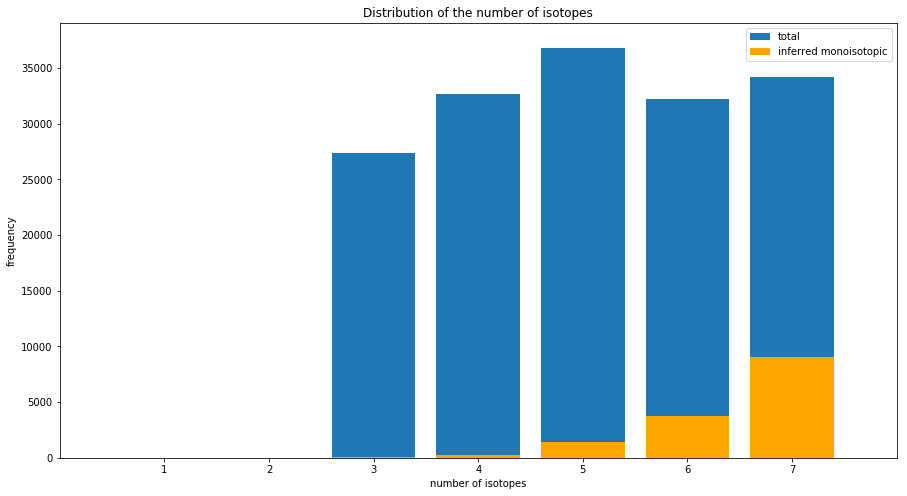

In [25]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Distribution of the number of isotopes')

counts = np.bincount(sequences_df.number_of_isotopes)
inferred_counts = np.bincount(inferred_sequences_df.number_of_isotopes)

ax1.bar(range(NUMBER_OF_ISOTOPES+1), counts, width=0.8, align='center', label='total')
ax1.bar(range(NUMBER_OF_ISOTOPES+1), inferred_counts, width=0.8, align='center', color='orange', label='inferred monoisotopic')

plt.xlabel('number of files in which a sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(1,NUMBER_OF_ISOTOPES+1), xlim=[0, NUMBER_OF_ISOTOPES+1])

plt.xlabel('number of isotopes')
plt.ylabel('frequency')

plt.legend(loc='best')

plt.show()